In [1]:
%load_ext autoreload
%autoreload 2
import Toolkit_Project as Tp
import numpy as np
import sys
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)  # to print total matrix

## Entering Data
## And a preview of Entire data

<function matplotlib.pyplot.show(close=None, block=None)>

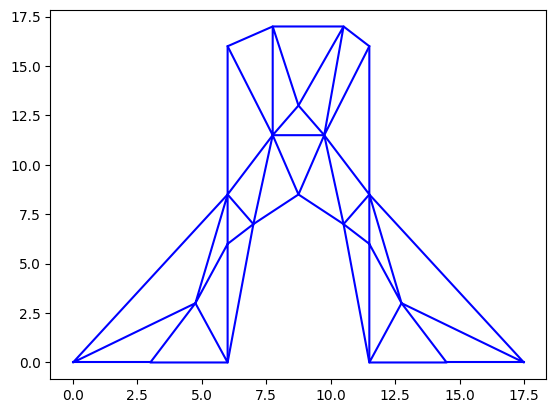

In [10]:
A = 50 / 10000  #m^2
E = 200 * 10 ** 9  # Pa
node = [0, Tp.Point(11.5, 8.5, 1), Tp.Point(11.5, 6, 2), Tp.Point(12.75, 3, 3), Tp.Point(4.75, 3, 4), Tp.Point(6, 6, 5),
        Tp.Point(7, 7, 6), Tp.Point(6, 8.5, 7), Tp.Point(7.75, 11.5, 8), Tp.Point(6, 16, 9), Tp.Point(7.75, 17, 10),
        Tp.Point(10.5, 17, 11), Tp.Point(11.5, 16, 12), Tp.Point(8.75, 13, 13), Tp.Point(9.75, 11.5, 14),
        Tp.Point(8.75, 8.5, 15), Tp.Point(10.5, 7, 16), Tp.Point(0, 0, 17), Tp.Point(3, 0, 18), Tp.Point(6, 0, 19),
        Tp.Point(11.5, 0, 20), Tp.Point(14.5, 0, 21),
        Tp.Point(17.5, 0, 22)]  # To correct the index we add 0 to the list.

n_node_total = len(node) - 1

x = []
y = []
n1 = [4, 5, 6, 15, 16, 2, 3, 1, 14, 8, 7, 4, 19, 5, 7, 9, 10, 11, 12, 1, 2, 20, 3]
n2 = [7, 17, 4, 18, 19, 6, 7]
n3 = [1, 22, 3, 21, 20, 16, 1]
n4 = [17, 18]
n5 = [22, 21]
n6 = [6, 8, 15, 14, 16]
n7 = [9, 8, 10, 13, 8]
n8 = [12, 14, 11, 13, 14]

n = [n1, n2, n3, n4, n5, n6, n7, n8]

for i in range(len(n)):
    x.append(np.array([]))
    y.append(np.array([]))
    for j in n[i]:
        x[i] = np.append(x[i], node[j].x)
        y[i] = np.append(y[i], node[j].y)
    plt.plot(x[i], y[i], "b")

plt.show

# Make Elements with K

In [11]:
Element = [Tp.Element(node[17], node[18], A=A, E=E), Tp.Element(node[18], node[19], A=A, E=E),
           Tp.Element(node[4], node[18], A=A, E=E), Tp.Element(node[4], node[19], A=A, E=E),
           Tp.Element(node[4], node[17], A=A, E=E), Tp.Element(node[7], node[17], A=A, E=E),
           Tp.Element(node[5], node[19], A=A, E=E), Tp.Element(node[4], node[5], A=A, E=E),
           Tp.Element(node[4], node[7], A=A, E=E), Tp.Element(node[6], node[19], A=A, E=E),
           Tp.Element(node[5], node[6], A=A, E=E), Tp.Element(node[5], node[7], A=A, E=E),
           Tp.Element(node[6], node[7], A=A, E=E), Tp.Element(node[6], node[8], A=A, E=E),
           Tp.Element(node[6], node[15], A=A, E=E), Tp.Element(node[8], node[15], A=A, E=E),
           Tp.Element(node[7], node[8], A=A, E=E), Tp.Element(node[7], node[9], A=A, E=E),
           Tp.Element(node[8], node[9], A=A, E=E), Tp.Element(node[8], node[10], A=A, E=E),
           Tp.Element(node[9], node[10], A=A, E=E), Tp.Element(node[10], node[11], A=A, E=E),
           Tp.Element(node[10], node[13], A=A, E=E), Tp.Element(node[8], node[13], A=A, E=E),
           Tp.Element(node[11], node[13], A=A, E=E), Tp.Element(node[13], node[14], A=A, E=E),
           Tp.Element(node[11], node[14], A=A, E=E), Tp.Element(node[8], node[14], A=A, E=E),
           Tp.Element(node[11], node[12], A=A, E=E), Tp.Element(node[12], node[14], A=A, E=E),
           Tp.Element(node[12], node[1], A=A, E=E), Tp.Element(node[14], node[1], A=A, E=E),
           Tp.Element(node[14], node[16], A=A, E=E), Tp.Element(node[15], node[16], A=A, E=E),
           Tp.Element(node[1], node[16], A=A, E=E), Tp.Element(node[16], node[20], A=A, E=E),
           Tp.Element(node[2], node[20], A=A, E=E), Tp.Element(node[1], node[2], A=A, E=E),
           Tp.Element(node[1], node[3], A=A, E=E), Tp.Element(node[1], node[22], A=A, E=E),
           Tp.Element(node[2], node[3], A=A, E=E), Tp.Element(node[3], node[20], A=A, E=E),
           Tp.Element(node[3], node[21], A=A, E=E), Tp.Element(node[3], node[22], A=A, E=E),
           Tp.Element(node[20], node[21], A=A, E=E), Tp.Element(node[21], node[22], A=A, E=E),
           Tp.Element(node[14], node[15], A=A, E=E), Tp.Element(node[16], node[2], A=A, E=E)]

#### Step 1: make total K as "K"

In [13]:
n_dim_total = 2 * n_node_total
K = np.zeros(n_dim_total * n_dim_total)  # n*n total
K_help = Tp.make_K_help(n_dim_total)  # n total
for i in range(0, len(Element)):
    K = Element[i].merge_K(K, K_help)
print(K.reshape(n_dim_total * n_dim_total))


[ 2.84449506e+08  4.71024852e+07  0.00000000e+00  0.00000000e+00
 -8.70809837e+06  3.83156328e+07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.31004597e+07  1.25315074e+08
  0.00000000e+00  0.00000000e+00 -1.70676983e+08 -2.56015475e+08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.19639648e+07  4.52822834e+07
  4.71024852e+07  1.36492107e+09  0.00000000e+00 -4.00000000e+08
  3.83156328e+07 -1.68588784e+08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

#### Step 2: make modified K as "K_modified"

In [14]:
n_dim_mod = 32  # Enter modified dimension
row = 1
column = 1
K_modified = np.array([])
new_K_help = Tp.make_K_help(n_dim_mod, row, column)  # show where is the modified K
for p, v in np.ndenumerate(K_help):
    if v in new_K_help:
        K_modified = np.append(K_modified, K[p])

K_modified = K_modified.reshape([n_dim_mod, n_dim_mod])  # shape the modified.
print(str(K_modified))

[[ 2.84449506e+08  4.71024852e+07  0.00000000e+00  0.00000000e+00
  -8.70809837e+06  3.83156328e+07  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.31004597e+07  1.25315074e+08
   0.00000000e+00  0.00000000e+00 -1.70676983e+08 -2.56015475e+08]
 [ 4.71024852e+07  1.36492107e+09  0.00000000e+00 -4.00000000e+08
   3.83156328e+07 -1.68588784e+08  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.33333333e+08
   0.00000000e+00  0.00000000e+00  1.25315074e+08 -2.14825841e+08
   0.0000

### F = K*D
#### find displacements as "displacements"

In [15]:
K_modified_inv = np.linalg.inv(K_modified)
F = np.zeros(n_dim_mod)
F[12] = 1500
F[16] = 1500
F[17] = -1000
F[19] = -1000
F[21] = -1000
F[23] = -1000
F_show = F.reshape((n_dim_mod, 1))
K_modified_inv_show = K_modified_inv.reshape((n_dim_mod, n_dim_mod))
displacements = np.dot(K_modified_inv_show, F_show)
displacements_show = displacements * 1000
displacements *= 1
print(displacements_show)

[[ 0.02163298]
 [-0.0040842 ]
 [ 0.02263842]
 [-0.00128498]
 [ 0.00174023]
 [-0.00407162]
 [ 0.00091796]
 [ 0.00160648]
 [ 0.02525021]
 [-0.00515249]
 [ 0.02959676]
 [-0.00845486]
 [ 0.03573243]
 [-0.00600726]
 [ 0.03331296]
 [-0.00617462]
 [ 0.07557971]
 [-0.0011369 ]
 [ 0.07415981]
 [-0.00193893]
 [ 0.07316901]
 [-0.01925542]
 [ 0.07386615]
 [-0.01789219]
 [ 0.03386533]
 [-0.00601648]
 [ 0.03216403]
 [-0.00504075]
 [ 0.02498124]
 [-0.0041811 ]
 [ 0.02203037]
 [-0.00372247]]


### F = K*D
#### make total displacements as "displacements_total"
#### find Forces as "F_total"

In [17]:
displacements_total = displacements
for i in range(n_dim_total - n_dim_mod):  # difference modified and total
    displacements_total = np.append(displacements_total, 0)
K = K.reshape([n_dim_total, n_dim_total])  # n*n total
displacements_total = displacements_total.reshape((n_dim_total, 1))
F_total = np.dot(K, displacements_total)
print(F_total)

[[-1.13686838e-12]
 [ 9.09494702e-13]
 [-4.54747351e-13]
 [-4.54747351e-13]
 [-1.13686838e-13]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.36424205e-12]
 [-1.81898940e-12]
 [-1.81898940e-12]
 [-1.13686838e-12]
 [ 0.00000000e+00]
 [ 1.50000000e+03]
 [-3.63797881e-12]
 [ 4.32009983e-12]
 [ 1.81898940e-12]
 [ 1.50000000e+03]
 [-1.00000000e+03]
 [-3.01270120e-12]
 [-1.00000000e+03]
 [ 2.72848411e-12]
 [-1.00000000e+03]
 [ 9.09494702e-13]
 [-1.00000000e+03]
 [-4.54747351e-12]
 [-1.36424205e-12]
 [-3.18323146e-12]
 [ 9.09494702e-13]
 [ 1.02318154e-12]
 [ 3.18323146e-12]
 [ 4.54747351e-13]
 [ 0.00000000e+00]
 [-1.11603243e+03]
 [-1.38798910e+03]
 [-2.68419665e+02]
 [-4.60147996e+02]
 [ 2.17395376e+02]
 [ 1.12364317e+03]
 [ 2.29560957e+02]
 [ 2.04362663e+03]
 [-6.37447037e+02]
 [ 1.09276635e+03]
 [-1.42505720e+03]
 [ 1.58810095e+03]]


# Plotting The Result

<function matplotlib.pyplot.show(close=None, block=None)>

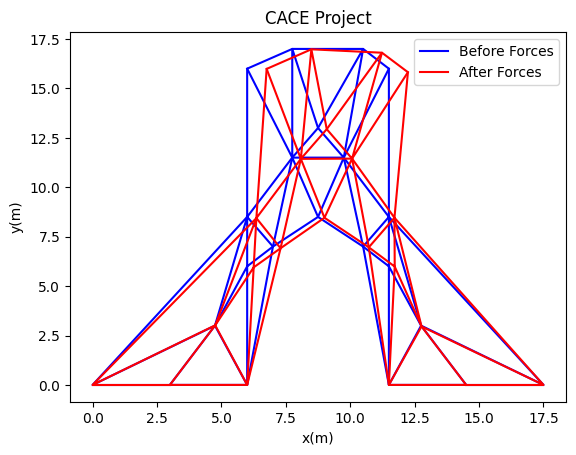

In [30]:
displacements_total_show = displacements_total.copy()
displacements_total_show *= 10000

x1 = []
y1 = []
x2 = []
y2 = []
n1 = [4, 5, 6, 15, 16, 2, 3, 1, 14, 8, 7, 4, 19, 5, 7, 9, 10, 11, 12, 1, 2, 20, 3]
n2 = [7, 17, 4, 18, 19, 6, 7]
n3 = [1, 22, 3, 21, 20, 16, 1]
n4 = [17, 18]
n5 = [22, 21]
n6 = [6, 8, 15, 14, 16]
n7 = [9, 8, 10, 13, 8]
n8 = [12, 14, 11, 13, 14]

n = [n1, n2, n3, n4, n5, n6, n7, n8]

for i in range(len(n)):
    x1.append(np.array([]))
    y1.append(np.array([]))
    for j in n[i]:
        x1[i] = np.append(x1[i], node[j].x)
        y1[i] = np.append(y1[i], node[j].y)
    plt.plot(x1[i], y1[i], "b")

for i in range(len(n)):
    x2.append(np.array([]))
    y2.append(np.array([]))
    for j in n[i]:
        x2[i] = np.append(x2[i], node[j].x + displacements_total_show[(j - 1) * 2])
        y2[i] = np.append(y2[i], node[j].y + displacements_total_show[(j - 1) * 2 + 1])
    plt.plot(x2[i], y2[i], "r")

plt.plot(0, 0, "b", label="Before Forces")
plt.plot(0, 0, "r", label="After Forces")

plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("CACE Project")
plt.legend()
plt.show